In [ ]:
!pip install segmentation_models_pytorch
!pip install wandb
!pip install torcheval
!pip install torchmetrics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Iniatial

In [ ]:
!mkdir Dataset
!mkdir Dataset/COMOFOD

!wget -P Dataset/COMOFOD https://www.vcl.fer.hr/comofod/comofod_small.rar

--2024-05-22 10:13:24--  https://www.vcl.fer.hr/comofod/comofod_small.rar
Resolving www.vcl.fer.hr (www.vcl.fer.hr)... 161.53.16.144
Connecting to www.vcl.fer.hr (www.vcl.fer.hr)|161.53.16.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3213318957 (3.0G) [application/octet-stream]
Saving to: ‘Dataset/COMOFOD/comofod_small.rar’

comofod_small.rar   100%[===================>]   2.99G  1.80MB/s    in 27m 37s 

2024-05-22 10:41:01 (1.85 MB/s) - ‘Dataset/COMOFOD/comofod_small.rar’ saved [3213318957/3213318957]



In [ ]:
!unrar x /content/Dataset/COMOFOD/comofod_small.rar /content/Dataset/COMOFOD

Streaming output truncated to the last 5000 lines.
Extracting  /content/Dataset/COMOFOD/CoMoFoD_small_v2/104_O_JC8.jpg       51%  OK 
Extracting  /content/Dataset/COMOFOD/CoMoFoD_small_v2/104_O_JC9.jpg       51%  OK 
Extracting  /content/Dataset/COMOFOD/CoMoFoD_small_v2/104_O_NA1.png       51%  OK 
Extracting  /content/Dataset/COMOFOD/CoMoFoD_small_v2/104_O_NA2.png       51%  OK 
Extracting  /content/Dataset/COMOFOD/CoMoFoD_small_v2/104_O_NA3.png       51%  OK 
Extracting  /content/Dataset/COMOFOD/CoMoFoD_small_v2/105_B.png           51%  OK 
Extracting  /content/Dataset/COMOFOD/CoMoFoD_small_v2/105_F.png           52%  OK 
Extracting  /content/Dataset/COMOFOD/CoMoFoD_small_v2/105_F_BC1.png       52%  OK 
Extracting  /content/Dataset/COMOFOD/CoMoFoD_small_v2/105_F_BC2.png       52%  OK 
Extracting  /content/Dataset/COMOFOD/CoMoFoD_small_v2/105_F_BC3.png       52%  OK 
Extracting  /content/Dataset/

In [ ]:
!rm -r /content/Dataset/COMOFOD/comofod_small.rar

In [ ]:
# import shutil

# shutil.rmtree('/Project/Dataset', ignore_errors=True)

# Libraries

In [1]:
# For managing COCO dataset
# from pycocotools.coco import COCO

# For creating and managing folder/ files
import glob
import os
import shutil

# For managing images
from PIL import Image
import skimage.io as io

# Basic libraries
import numpy as np
import pandas as pd
import random
import cv2

# For plotting
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import wandb

# For importing models and working with them
## Torch
import torch
import torch.utils.data # for Dataset
import torch.nn as nn
from torch.optim import Adam
from torch.autograd import Variable
from torch.utils.data import DataLoader, Dataset
import segmentation_models_pytorch as smp

## Torchvision
import torchvision
from torchvision.transforms import transforms

# For creating train - test splits
from sklearn.model_selection import train_test_split

import pathlib
import pylab
import requests
from io import BytesIO
from pprint import pprint
from tqdm import tqdm
import time
from imutils import paths

# Performance Metrics
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix


# Functions - to have them separated in files
import CalcMetrics as cm
import BinaryMasks as bm
import TrainModel as trModel
import ValidateModel as valModel
import TestModel as testModel
import CreateDataset_Comofod as com
import CreateDataset_IMD2020 as imd
import DisplayMetrics as dm
import PlotResults as pr
import MainLoop as main
import EarlyStopping as stopping


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)


# %matplotlib inline

cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda


# Data

## Data Preparation

In [2]:
dataset_path = '/content/drive/MyDrive/CoMoFoD/comofod_small/CoMoFoD_small_v2'
original_images, altered_images, masks, coloured_masks = crd.load_dataset(dataset_path)

Starting loading dataset


In [3]:
len(original_images)

200

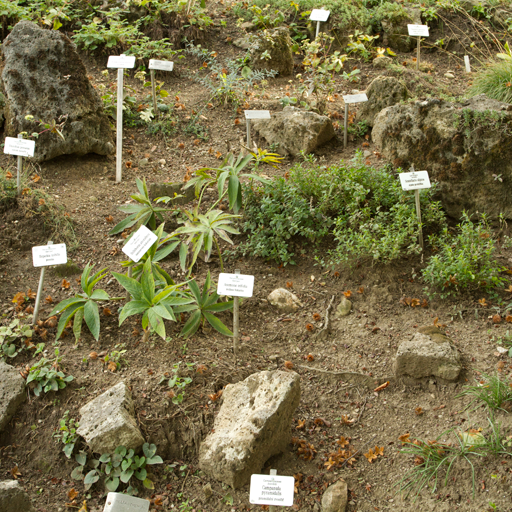

In [4]:
original_images[1]

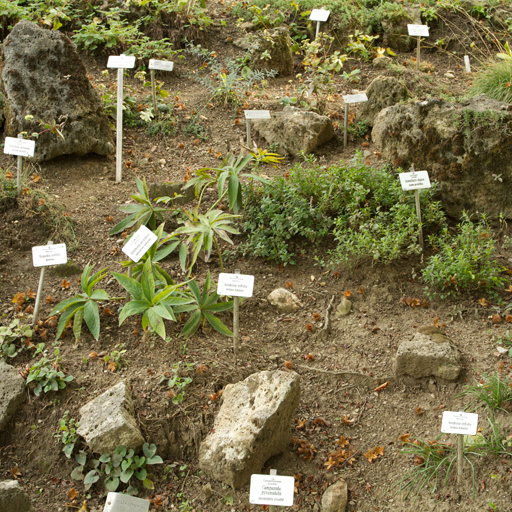

In [5]:
altered_images[1]

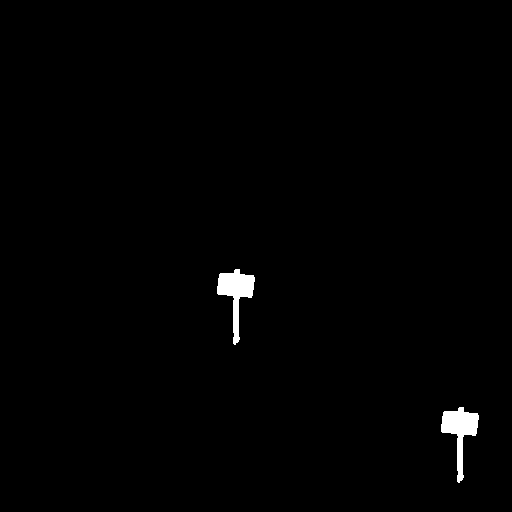

In [6]:
masks[1]

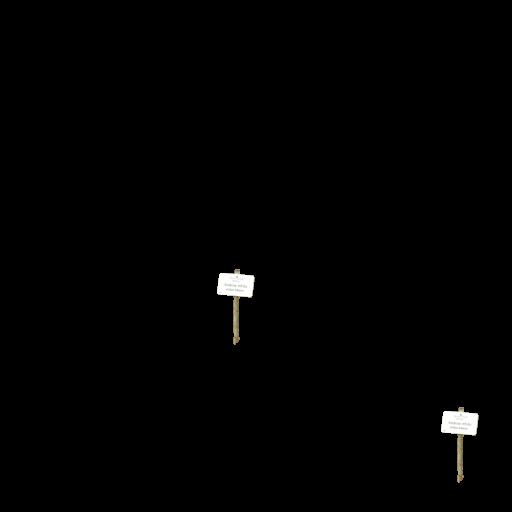

In [7]:
coloured_masks[1]

In [8]:
len(altered_images)

200

In [9]:
# 73c482950d37419655b401f882c34c719ca587af

## Main

In [ ]:
RESNET_SIZE = 256
transf_size = RESNET_SIZE

# Initialize transformations - train
transforms_train = transforms.Compose([
    transforms.Resize((transf_size, transf_size)),
    transforms.ToTensor(),
])

# Initialize transformations - test (optional)
transforms_test = transforms.Compose([
    transforms.Resize((transf_size, transf_size)),
    transforms.ToTensor(),
])

# Initialize the U-Net model
# unet = smp.Unet(
#                 encoder_name = "resnet101",
#                 encoder_weights = "imagenet",
#                 in_channels = 3,  # 3 channels for the image
#                 classes = 1,  # 1 class => binary mask
#                 activation = 'sigmoid'
#                ).to(device)


# Define hyperparameters
INIT_LR = 0.0001
BATCH_SIZE = 8
NUM_EPOCHS = [10, 20, 50, 100, 150]
TEST_SPLIT = [0.1, 0.2] # 0.3
VALID_SPLIT = 0.2 # 0.1

model_type = 'GCA' # unet
channels = 3 # 6
dataset_type = 'comofod' # imd

wb_name = "GCANet_COMOFOD_altered_imgs"

main.main_loop(original_images, altered_images, masks, transforms_train, transforms_test,
               model_type, channels, dataset_type,
               wb_name, INIT_LR, BATCH_SIZE, NUM_EPOCHS, TEST_SPLIT, VALID_SPLIT)





wandb: Currently logged in as: bianca-apostolescu (bianca-team). Use `wandb login --relogin` to force relogin


[INFO] TEST_SPLIT = 0.1 ...
Splits, Datasets, and Dataloaders
[INFO] Total time taken to create the dataset and dataloader: 0.00s
trainSteps = 18, testSteps = 2, valSteps = 4


[INFO] Training the network for 10 epochs...


  0%|          | 0/10 [00:00<?, ?it/s]

Training...


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Validating...


 10%|█         | 1/10 [00:09<01:27,  9.70s/it]

Training...
Validating...


 20%|██        | 2/10 [00:17<01:10,  8.82s/it]

Training...
Validating...


 30%|███       | 3/10 [00:26<01:00,  8.69s/it]

Training...
Validating...


 40%|████      | 4/10 [00:34<00:51,  8.60s/it]

Training...
Validating...


 50%|█████     | 5/10 [00:43<00:42,  8.55s/it]

Training...
Validating...


 60%|██████    | 6/10 [00:52<00:34,  8.60s/it]

Training...
Validating...


 70%|███████   | 7/10 [01:00<00:25,  8.55s/it]

Training...
Validating...


 80%|████████  | 8/10 [01:09<00:17,  8.61s/it]

Training...
Validating...


 90%|█████████ | 9/10 [01:17<00:08,  8.60s/it]

Training...
Validating...


100%|██████████| 10/10 [01:26<00:00,  8.65s/it]


[INFO] Total time taken to train and validate the model: 86.55s
Testing...






avg_accuracy = 0.9455859065055847, avg_precision = 0.8082898259162903, avg_recall = 0.6084123253822327, avg_f1_score = 0.6887643933296204, avg_dice_score = 0.6887645125389099, avg_iou = 0.5261673927307129


Accuracy,▁
DICE,▁
Epoch,▁▂▃▃▄▅▆▆▇█
F1-Score,▁
IOU,▁
Precision,▁
Recall,▁
Train Loss,█▇▆▅▄▃▂▂▁▁
Valid Loss,█▇▆▅▄▃▂▂▂▁
Accuracy,0.94559
DICE,0.68876


[INFO] Training the network for 20 epochs...


  0%|          | 0/20 [00:00<?, ?it/s]

Training...
Validating...


  5%|▌         | 1/20 [00:08<02:49,  8.93s/it]

Training...
Validating...


 10%|█         | 2/20 [00:17<02:38,  8.81s/it]

Training...
Validating...


 15%|█▌        | 3/20 [00:26<02:28,  8.71s/it]

Training...
Validating...


 20%|██        | 4/20 [00:35<02:20,  8.77s/it]

Training...
Validating...


 25%|██▌       | 5/20 [00:43<02:10,  8.69s/it]

Training...
Validating...


 30%|███       | 6/20 [00:52<02:02,  8.77s/it]

Training...
Validating...


 35%|███▌      | 7/20 [01:01<01:54,  8.82s/it]

Training...
Validating...


 40%|████      | 8/20 [01:10<01:45,  8.80s/it]

Training...
Validating...


 45%|████▌     | 9/20 [01:19<01:37,  8.84s/it]

Training...
Validating...


 50%|█████     | 10/20 [01:27<01:28,  8.82s/it]

Training...
Validating...


 55%|█████▌    | 11/20 [01:36<01:19,  8.85s/it]

Training...
Validating...


 60%|██████    | 12/20 [01:45<01:11,  8.90s/it]

Training...
Validating...


 65%|██████▌   | 13/20 [01:54<01:01,  8.85s/it]

Training...
Validating...


 70%|███████   | 14/20 [02:03<00:53,  8.91s/it]

Training...
Validating...


 75%|███████▌  | 15/20 [02:12<00:44,  8.96s/it]

Training...
Validating...


 80%|████████  | 16/20 [02:21<00:35,  8.90s/it]

Training...
Validating...


 85%|████████▌ | 17/20 [02:30<00:26,  8.96s/it]

Training...
Validating...


 90%|█████████ | 18/20 [02:39<00:17,  8.94s/it]

Training...
Validating...


 95%|█████████▌| 19/20 [02:48<00:08,  8.98s/it]

Training...
Validating...


100%|██████████| 20/20 [02:57<00:00,  8.88s/it]


[INFO] Total time taken to train and validate the model: 177.69s
Testing...






avg_accuracy = 0.9804738163948059, avg_precision = 0.8885106444358826, avg_recall = 0.9000452160835266, avg_f1_score = 0.8935880661010742, avg_dice_score = 0.8935881853103638, avg_iou = 0.8108014464378357


Accuracy,▁
DICE,▁
Epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
F1-Score,▁
IOU,▁
Precision,▁
Recall,▁
Train Loss,█▇▅▅▄▄▄▃▃▃▃▂▂▂▂▂▂▁▁▁
Valid Loss,█▆▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁
Accuracy,0.98047
DICE,0.89359


[INFO] Training the network for 50 epochs...


  0%|          | 0/50 [00:00<?, ?it/s]

Training...
Validating...


  2%|▏         | 1/50 [00:09<07:24,  9.07s/it]

Training...
Validating...


  4%|▍         | 2/50 [00:17<07:07,  8.90s/it]

Training...
Validating...


  6%|▌         | 3/50 [00:26<07:00,  8.94s/it]

Training...
Validating...


  8%|▊         | 4/50 [00:35<06:48,  8.87s/it]

Training...
Validating...


 10%|█         | 5/50 [00:44<06:41,  8.93s/it]

Training...
Validating...


 12%|█▏        | 6/50 [00:53<06:34,  8.98s/it]

Training...
Validating...


 14%|█▍        | 7/50 [01:02<06:22,  8.90s/it]

Training...
Validating...


 16%|█▌        | 8/50 [01:11<06:16,  8.96s/it]

Training...
Validating...


 18%|█▊        | 9/50 [01:20<06:09,  9.00s/it]

Training...
Validating...


 20%|██        | 10/50 [01:29<05:58,  8.96s/it]

Training...
Validating...


 22%|██▏       | 11/50 [01:38<05:50,  9.00s/it]

Training...
Validating...


 24%|██▍       | 12/50 [01:47<05:41,  8.98s/it]

Training...
Validating...


 26%|██▌       | 13/50 [01:56<05:32,  8.99s/it]

Training...
Validating...


 28%|██▊       | 14/50 [02:05<05:24,  9.02s/it]

Training...
Validating...


 30%|███       | 15/50 [02:14<05:13,  8.96s/it]

Training...
Validating...


 32%|███▏      | 16/50 [02:23<05:06,  9.00s/it]

Training...
Validating...


 34%|███▍      | 17/50 [02:32<04:57,  9.03s/it]

Training...
Validating...


 36%|███▌      | 18/50 [02:41<04:47,  8.99s/it]

Training...
Validating...


 38%|███▊      | 19/50 [02:50<04:40,  9.03s/it]

Training...
Validating...


 40%|████      | 20/50 [02:59<04:30,  9.01s/it]

Training...
Validating...


 42%|████▏     | 21/50 [03:08<04:21,  9.02s/it]

Training...
Validating...


 44%|████▍     | 22/50 [03:17<04:13,  9.04s/it]

Training...
Validating...


 46%|████▌     | 23/50 [03:26<04:02,  9.00s/it]

Training...
Validating...


 48%|████▊     | 24/50 [03:35<03:54,  9.02s/it]

Training...
Validating...


 50%|█████     | 25/50 [03:45<03:47,  9.10s/it]

Training...
Validating...


 52%|█████▏    | 26/50 [03:53<03:36,  9.01s/it]

Training...
Validating...


 54%|█████▍    | 27/50 [04:02<03:27,  9.04s/it]

Training...
Validating...


 56%|█████▌    | 28/50 [04:12<03:19,  9.06s/it]

Training...
Validating...


 58%|█████▊    | 29/50 [04:20<03:09,  9.02s/it]

Training...
Validating...


 60%|██████    | 30/50 [04:30<03:00,  9.05s/it]

Training...
Validating...


 62%|██████▏   | 31/50 [04:39<02:51,  9.04s/it]

Training...
Validating...


 64%|██████▍   | 32/50 [04:48<02:42,  9.04s/it]

Training...
Validating...


 66%|██████▌   | 33/50 [04:57<02:33,  9.06s/it]

Training...
Validating...


 68%|██████▊   | 34/50 [05:06<02:23,  8.98s/it]

Training...
Validating...


 70%|███████   | 35/50 [05:15<02:15,  9.03s/it]

Training...
Validating...


 72%|███████▏  | 36/50 [05:24<02:06,  9.07s/it]

Training...
Validating...


 74%|███████▍  | 37/50 [05:33<01:57,  9.01s/it]

Training...
Validating...


 76%|███████▌  | 38/50 [05:42<01:48,  9.05s/it]

Training...
Validating...


 78%|███████▊  | 39/50 [05:51<01:39,  9.04s/it]

Training...
Validating...


 80%|████████  | 40/50 [06:00<01:30,  9.03s/it]

Training...
Validating...


 82%|████████▏ | 41/50 [06:09<01:21,  9.06s/it]

Training...
Validating...


 84%|████████▍ | 42/50 [06:18<01:11,  8.98s/it]

Training...
Validating...


 86%|████████▌ | 43/50 [06:27<01:03,  9.03s/it]

Training...
Validating...


 88%|████████▊ | 44/50 [06:36<00:54,  9.07s/it]

Training...
Validating...


 90%|█████████ | 45/50 [06:45<00:45,  9.01s/it]

Training...
Validating...


 92%|█████████▏| 46/50 [06:54<00:36,  9.06s/it]

Training...
Validating...


 94%|█████████▍| 47/50 [07:03<00:27,  9.04s/it]

Training...
Validating...


 96%|█████████▌| 48/50 [07:12<00:18,  9.03s/it]

Training...
Validating...


 98%|█████████▊| 49/50 [07:21<00:09,  9.07s/it]

Training...
Validating...


100%|██████████| 50/50 [07:30<00:00,  9.01s/it]


[INFO] Total time taken to train and validate the model: 450.68s
Testing...






avg_accuracy = 0.9826259613037109, avg_precision = 0.9201605916023254, avg_recall = 0.8790225386619568, avg_f1_score = 0.8984495997428894, avg_dice_score = 0.8984495997428894, avg_iou = 0.8208773136138916


Accuracy,▁
DICE,▁
Epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
F1-Score,▁
IOU,▁
Precision,▁
Recall,▁
Train Loss,█▇▇▆▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
Valid Loss,█▇▆▆▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁
Accuracy,0.98263
DICE,0.89845


[INFO] Training the network for 100 epochs...


  0%|          | 0/100 [00:00<?, ?it/s]

Training...
Validating...


  1%|          | 1/100 [00:08<14:43,  8.92s/it]

Training...
Validating...


  2%|▏         | 2/100 [00:18<14:47,  9.06s/it]

Training...
Validating...


  3%|▎         | 3/100 [00:26<14:27,  8.94s/it]

Training...
Validating...


  4%|▍         | 4/100 [00:36<14:26,  9.03s/it]

Training...
Validating...


  5%|▌         | 5/100 [00:45<14:20,  9.06s/it]

Training...
Validating...


  6%|▌         | 6/100 [00:53<14:02,  8.96s/it]

Training...
Validating...


  7%|▋         | 7/100 [01:03<13:56,  9.00s/it]

Training...
Validating...


  8%|▊         | 8/100 [01:12<13:49,  9.02s/it]

Training...
Validating...


  9%|▉         | 9/100 [01:21<13:39,  9.01s/it]

Training...
Validating...


 10%|█         | 10/100 [01:30<13:34,  9.05s/it]

Training...
Validating...


 11%|█         | 11/100 [01:39<13:24,  9.04s/it]

Training...
Validating...


 12%|█▏        | 12/100 [01:48<13:14,  9.03s/it]

Training...
Validating...


 13%|█▎        | 13/100 [01:57<13:09,  9.07s/it]

Training...
Validating...


 14%|█▍        | 14/100 [02:06<12:53,  9.00s/it]

Training...
Validating...


 15%|█▌        | 15/100 [02:15<12:48,  9.04s/it]

Training...
Validating...


 16%|█▌        | 16/100 [02:24<12:42,  9.08s/it]

Training...
Validating...


 17%|█▋        | 17/100 [02:33<12:28,  9.02s/it]

Training...
Validating...


 18%|█▊        | 18/100 [02:42<12:20,  9.03s/it]

Training...
Validating...


 19%|█▉        | 19/100 [02:51<12:11,  9.04s/it]

Training...
Validating...


 20%|██        | 20/100 [03:00<12:02,  9.03s/it]

Training...
Validating...


 21%|██        | 21/100 [03:09<11:56,  9.07s/it]

Training...
Validating...


 22%|██▏       | 22/100 [03:18<11:41,  9.00s/it]

Training...
Validating...


 23%|██▎       | 23/100 [03:27<11:36,  9.04s/it]

Training...
Validating...


 24%|██▍       | 24/100 [03:36<11:29,  9.07s/it]

Training...
Validating...


 25%|██▌       | 25/100 [03:45<11:15,  9.01s/it]

Training...
Validating...


 26%|██▌       | 26/100 [03:54<11:09,  9.05s/it]

Training...
Validating...


 27%|██▋       | 27/100 [04:03<11:00,  9.05s/it]

Training...
Validating...


 28%|██▊       | 28/100 [04:12<10:50,  9.04s/it]

Training...
Validating...


 29%|██▉       | 29/100 [04:22<10:44,  9.08s/it]

Training...
Validating...


 30%|███       | 30/100 [04:30<10:31,  9.03s/it]

Training...
Validating...


 31%|███       | 31/100 [04:40<10:26,  9.08s/it]

Training...
Validating...


 32%|███▏      | 32/100 [04:49<10:20,  9.13s/it]

Training...
Validating...


 33%|███▎      | 33/100 [04:58<10:05,  9.03s/it]

Training...
Validating...


 34%|███▍      | 34/100 [05:07<09:58,  9.07s/it]

Training...
Validating...


 35%|███▌      | 35/100 [05:16<09:49,  9.07s/it]

Training...
Validating...


 36%|███▌      | 36/100 [05:25<09:38,  9.04s/it]

Training...
Validating...


 37%|███▋      | 37/100 [05:34<09:31,  9.07s/it]

Training...
Validating...


 38%|███▊      | 38/100 [05:43<09:19,  9.02s/it]

Training...
Validating...


 39%|███▉      | 39/100 [05:52<09:11,  9.04s/it]

Training...
Validating...


 40%|████      | 40/100 [06:01<09:04,  9.08s/it]

Training...
Validating...


 41%|████      | 41/100 [06:10<08:50,  8.99s/it]

Training...
Validating...


 42%|████▏     | 42/100 [06:19<08:43,  9.02s/it]

Training...
Validating...


 43%|████▎     | 43/100 [06:28<08:36,  9.06s/it]

Training...
Validating...


 44%|████▍     | 44/100 [06:37<08:25,  9.03s/it]

Training...
Validating...


 45%|████▌     | 45/100 [06:46<08:18,  9.06s/it]

Training...
Validating...


 46%|████▌     | 46/100 [06:55<08:07,  9.02s/it]

Training...
Validating...


 47%|████▋     | 47/100 [07:04<07:59,  9.04s/it]

Training...
Validating...


 48%|████▊     | 48/100 [07:13<07:51,  9.07s/it]

Training...
Validating...


 49%|████▉     | 49/100 [07:22<07:38,  9.00s/it]

Training...
Validating...


 50%|█████     | 50/100 [07:31<07:32,  9.04s/it]

Training...
Validating...


 51%|█████     | 51/100 [07:41<07:24,  9.07s/it]

Training...
Validating...


 52%|█████▏    | 52/100 [07:49<07:12,  9.01s/it]

Training...
Validating...


 53%|█████▎    | 53/100 [07:59<07:05,  9.05s/it]

Training...
Validating...


 54%|█████▍    | 54/100 [08:08<06:56,  9.05s/it]

Training...
Validating...


 55%|█████▌    | 55/100 [08:17<06:46,  9.04s/it]

Training...
Validating...


 56%|█████▌    | 56/100 [08:26<06:39,  9.08s/it]

Training...
Validating...


 57%|█████▋    | 57/100 [08:35<06:26,  8.99s/it]

Training...
Validating...


 58%|█████▊    | 58/100 [08:44<06:19,  9.04s/it]

Training...
Validating...


 59%|█████▉    | 59/100 [08:53<06:13,  9.10s/it]

Training...
Validating...


 60%|██████    | 60/100 [09:02<06:01,  9.04s/it]

Training...
Validating...


 61%|██████    | 61/100 [09:11<05:53,  9.07s/it]

Training...
Validating...


 62%|██████▏   | 62/100 [09:20<05:45,  9.08s/it]

Training...
Validating...


 63%|██████▎   | 63/100 [09:29<05:35,  9.06s/it]

Training...
Validating...


 64%|██████▍   | 64/100 [09:38<05:27,  9.10s/it]

Training...
Validating...


 65%|██████▌   | 65/100 [09:47<05:16,  9.04s/it]

Training...
Validating...


 66%|██████▌   | 66/100 [09:56<05:08,  9.07s/it]

Training...
Validating...


 67%|██████▋   | 67/100 [10:06<05:01,  9.13s/it]

Training...
Validating...


 68%|██████▊   | 68/100 [10:14<04:49,  9.04s/it]

Training...
Validating...


 69%|██████▉   | 69/100 [10:24<04:41,  9.09s/it]

Training...
Validating...


 70%|███████   | 70/100 [10:33<04:32,  9.10s/it]

Training...
Validating...


 71%|███████   | 71/100 [10:42<04:22,  9.04s/it]

Training...
Validating...


 72%|███████▏  | 72/100 [10:51<04:13,  9.07s/it]

Training...
Validating...


 73%|███████▎  | 73/100 [11:00<04:04,  9.04s/it]

Training...
Validating...


 74%|███████▍  | 74/100 [11:09<03:55,  9.05s/it]

Training...
Validating...


 75%|███████▌  | 75/100 [11:18<03:46,  9.08s/it]

Training...
Validating...


 76%|███████▌  | 76/100 [11:27<03:35,  8.99s/it]

Training...
Validating...


 77%|███████▋  | 77/100 [11:36<03:27,  9.03s/it]

Training...
Validating...


 78%|███████▊  | 78/100 [11:45<03:19,  9.06s/it]

Training...
Validating...


 79%|███████▉  | 79/100 [11:54<03:09,  9.04s/it]

Training...
Validating...


 80%|████████  | 80/100 [12:03<03:01,  9.07s/it]

Training...
Validating...


 81%|████████  | 81/100 [12:12<02:51,  9.03s/it]

Training...
Validating...


 82%|████████▏ | 82/100 [12:21<02:42,  9.05s/it]

Training...
Validating...


 83%|████████▎ | 83/100 [12:30<02:34,  9.09s/it]

Training...
Validating...


 84%|████████▍ | 84/100 [12:39<02:24,  9.01s/it]

Training...
Validating...


 85%|████████▌ | 85/100 [12:48<02:15,  9.04s/it]

Training...
Validating...


 86%|████████▌ | 86/100 [12:57<02:06,  9.06s/it]

Training...
Validating...


 87%|████████▋ | 87/100 [13:06<01:57,  9.02s/it]

Training...
Validating...


 88%|████████▊ | 88/100 [13:16<01:48,  9.06s/it]

Training...
Validating...


 89%|████████▉ | 89/100 [13:25<01:39,  9.04s/it]

Training...
Validating...


 90%|█████████ | 90/100 [13:34<01:30,  9.04s/it]

Training...
Validating...


 91%|█████████ | 91/100 [13:43<01:21,  9.07s/it]

Training...
Validating...


 92%|█████████▏| 92/100 [13:52<01:11,  8.99s/it]

Training...
Validating...


 93%|█████████▎| 93/100 [14:01<01:03,  9.03s/it]

Training...
Validating...


 94%|█████████▍| 94/100 [14:10<00:54,  9.07s/it]

Training...
Validating...


 95%|█████████▌| 95/100 [14:19<00:45,  9.03s/it]

Training...
Validating...


 96%|█████████▌| 96/100 [14:28<00:36,  9.07s/it]

Training...
Validating...


 97%|█████████▋| 97/100 [14:37<00:27,  9.06s/it]

Training...
Validating...


 98%|█████████▊| 98/100 [14:46<00:18,  9.06s/it]

Training...
Validating...


 99%|█████████▉| 99/100 [14:55<00:09,  9.08s/it]

Training...
Validating...


100%|██████████| 100/100 [15:04<00:00,  9.04s/it]


[INFO] Total time taken to train and validate the model: 904.50s
Testing...






avg_accuracy = 0.9915987849235535, avg_precision = 0.969721794128418, avg_recall = 0.93406742811203, avg_f1_score = 0.9514927268028259, avg_dice_score = 0.9514927864074707, avg_iou = 0.9087005853652954


Accuracy,▁
DICE,▁
Epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
F1-Score,▁
IOU,▁
Precision,▁
Recall,▁
Train Loss,█▇▆▆▆▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁
Valid Loss,█▇▆▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁
Accuracy,0.9916
DICE,0.95149


[INFO] Training the network for 150 epochs...


  0%|          | 0/150 [00:00<?, ?it/s]

Training...
Validating...


  1%|          | 1/150 [00:08<22:00,  8.86s/it]

Training...
Validating...


  1%|▏         | 2/150 [00:17<22:08,  8.97s/it]

Training...
Validating...


  2%|▏         | 3/150 [00:26<22:00,  8.98s/it]

Training...
Validating...


  3%|▎         | 4/150 [00:35<21:49,  8.97s/it]

Training...
Validating...


  3%|▎         | 5/150 [00:44<21:46,  9.01s/it]

Training...
Validating...


  4%|▍         | 6/150 [00:53<21:24,  8.92s/it]

Training...
Validating...


  5%|▍         | 7/150 [01:02<21:25,  8.99s/it]

Training...
Validating...


  5%|▌         | 8/150 [01:11<21:21,  9.02s/it]

Training...
Validating...


  6%|▌         | 9/150 [01:20<21:05,  8.98s/it]

Training...
Validating...


  7%|▋         | 10/150 [01:29<21:03,  9.03s/it]

Training...
Validating...


  7%|▋         | 11/150 [01:38<20:52,  9.01s/it]

Training...
Validating...


  8%|▊         | 12/150 [01:47<20:44,  9.02s/it]

Training...
Validating...


  9%|▊         | 13/150 [01:57<20:42,  9.07s/it]

Training...
Validating...


  9%|▉         | 14/150 [02:05<20:22,  8.99s/it]

Training...
Validating...


 10%|█         | 15/150 [02:15<20:17,  9.02s/it]

Training...
Validating...


 11%|█         | 16/150 [02:24<20:13,  9.05s/it]

Training...
Validating...


 11%|█▏        | 17/150 [02:33<20:00,  9.02s/it]

Training...
Validating...


 12%|█▏        | 18/150 [02:42<19:55,  9.06s/it]

Training...
Validating...


 13%|█▎        | 19/150 [02:51<19:42,  9.03s/it]

Training...
Validating...


 13%|█▎        | 20/150 [03:00<19:37,  9.06s/it]

Training...
Validating...


 14%|█▍        | 21/150 [03:09<19:31,  9.08s/it]

Training...
Validating...


 15%|█▍        | 22/150 [03:18<19:10,  8.99s/it]

Training...
Validating...


 15%|█▌        | 23/150 [03:27<19:05,  9.02s/it]

Training...
Validating...


 16%|█▌        | 24/150 [03:36<19:01,  9.06s/it]

Training...
Validating...


 17%|█▋        | 25/150 [03:45<18:44,  9.00s/it]

Training...
Validating...


 17%|█▋        | 26/150 [03:54<18:40,  9.03s/it]

Training...
Validating...


 18%|█▊        | 27/150 [04:03<18:29,  9.02s/it]

Training...
Validating...


 19%|█▊        | 28/150 [04:12<18:19,  9.01s/it]

Training...
Validating...


 19%|█▉        | 29/150 [04:21<18:13,  9.04s/it]

Training...
Validating...


 20%|██        | 30/150 [04:30<17:55,  8.97s/it]

Training...
Validating...


 21%|██        | 31/150 [04:39<17:53,  9.02s/it]

Training...
Validating...


 21%|██▏       | 32/150 [04:48<17:47,  9.05s/it]

Training...
Validating...


 22%|██▏       | 33/150 [04:57<17:32,  9.00s/it]

Training...
Validating...


 23%|██▎       | 34/150 [05:06<17:26,  9.02s/it]

Training...
Validating...


 23%|██▎       | 35/150 [05:15<17:18,  9.03s/it]

Training...
Validating...


 24%|██▍       | 36/150 [05:24<17:07,  9.02s/it]

Training...
Validating...


 25%|██▍       | 37/150 [05:33<17:01,  9.04s/it]

Training...
Validating...


 25%|██▌       | 38/150 [05:42<16:43,  8.96s/it]

Training...
Validating...


 26%|██▌       | 39/150 [05:51<16:40,  9.02s/it]

Training...
Validating...


 27%|██▋       | 40/150 [06:00<16:36,  9.06s/it]

Training...
Validating...


 27%|██▋       | 41/150 [06:09<16:20,  9.00s/it]

Training...
Validating...


 28%|██▊       | 42/150 [06:18<16:15,  9.04s/it]

Training...
Validating...


 29%|██▊       | 43/150 [06:27<16:06,  9.03s/it]

Training...
Validating...


 29%|██▉       | 44/150 [06:36<15:56,  9.02s/it]

Training...
Validating...


 30%|███       | 45/150 [06:45<15:50,  9.05s/it]

Training...
Validating...


 31%|███       | 46/150 [06:54<15:33,  8.97s/it]

Training...
Validating...


 31%|███▏      | 47/150 [07:03<15:29,  9.03s/it]

Training...
Validating...


 32%|███▏      | 48/150 [07:13<15:25,  9.08s/it]

Training...
Validating...


 33%|███▎      | 49/150 [07:21<15:10,  9.01s/it]

Training...
Validating...


 33%|███▎      | 50/150 [07:31<15:05,  9.06s/it]

Training...
Validating...


 34%|███▍      | 51/150 [07:40<14:54,  9.04s/it]

Training...
Validating...


 35%|███▍      | 52/150 [07:49<14:45,  9.04s/it]

Training...
Validating...


 35%|███▌      | 53/150 [07:58<14:38,  9.06s/it]

Training...
Validating...


 36%|███▌      | 54/150 [08:07<14:22,  8.98s/it]

Training...
Validating...


 37%|███▋      | 55/150 [08:16<14:17,  9.02s/it]

Training...
Validating...


 37%|███▋      | 56/150 [08:25<14:11,  9.06s/it]

Training...
Validating...


 38%|███▊      | 57/150 [08:34<13:57,  9.01s/it]

Training...
Validating...


 39%|███▊      | 58/150 [08:43<13:53,  9.06s/it]

Training...
Validating...


 39%|███▉      | 59/150 [08:52<13:42,  9.04s/it]

Training...
Validating...


 40%|████      | 60/150 [09:01<13:33,  9.04s/it]

Training...
Validating...


 41%|████      | 61/150 [09:10<13:26,  9.06s/it]

Training...
Validating...


 41%|████▏     | 62/150 [09:19<13:09,  8.98s/it]

Training...
Validating...


 42%|████▏     | 63/150 [09:28<13:04,  9.02s/it]

Training...
Validating...


 43%|████▎     | 64/150 [09:37<13:01,  9.09s/it]

Training...
Validating...


 43%|████▎     | 65/150 [09:46<12:46,  9.01s/it]

Training...
Validating...


 44%|████▍     | 66/150 [09:55<12:39,  9.04s/it]

Training...
Validating...


 45%|████▍     | 67/150 [10:04<12:29,  9.03s/it]

Training...
Validating...


 45%|████▌     | 68/150 [10:13<12:19,  9.02s/it]

Training...
Validating...


 46%|████▌     | 69/150 [10:22<12:12,  9.05s/it]

Training...
Validating...


 47%|████▋     | 70/150 [10:31<11:57,  8.97s/it]

Training...
Validating...


 47%|████▋     | 71/150 [10:40<11:52,  9.02s/it]

Training...
Validating...


 48%|████▊     | 72/150 [10:49<11:46,  9.06s/it]

Training...
Validating...


 49%|████▊     | 73/150 [10:58<11:33,  9.00s/it]

Training...
Validating...


 49%|████▉     | 74/150 [11:07<11:27,  9.05s/it]

Training...
Validating...


 50%|█████     | 75/150 [11:16<11:17,  9.04s/it]

Training...
Validating...


 51%|█████     | 76/150 [11:25<11:07,  9.02s/it]

Training...
Validating...


 51%|█████▏    | 77/150 [11:34<11:02,  9.07s/it]

Training...
Validating...


 52%|█████▏    | 78/150 [11:43<10:46,  8.98s/it]

Training...
Validating...


 53%|█████▎    | 79/150 [11:52<10:40,  9.02s/it]

Training...
Validating...


 53%|█████▎    | 80/150 [12:02<10:34,  9.06s/it]

Training...
Validating...


 54%|█████▍    | 81/150 [12:10<10:21,  9.01s/it]

Training...
Validating...


 55%|█████▍    | 82/150 [12:19<10:14,  9.04s/it]

Training...
Validating...


 55%|█████▌    | 83/150 [12:28<10:04,  9.03s/it]

Training...
Validating...


 56%|█████▌    | 84/150 [12:38<09:56,  9.03s/it]

Training...
Validating...


 57%|█████▋    | 85/150 [12:47<09:49,  9.06s/it]

Training...
Validating...


 57%|█████▋    | 86/150 [12:55<09:35,  8.99s/it]

Training...
Validating...


 58%|█████▊    | 87/150 [13:05<09:28,  9.03s/it]

Training...
Validating...


 59%|█████▊    | 88/150 [13:14<09:22,  9.07s/it]

Training...
Validating...


 59%|█████▉    | 89/150 [13:23<09:09,  9.01s/it]

Training...
Validating...


 60%|██████    | 90/150 [13:32<09:02,  9.04s/it]

Training...
Validating...


 61%|██████    | 91/150 [13:41<08:52,  9.02s/it]

Training...
Validating...


 61%|██████▏   | 92/150 [13:50<08:42,  9.01s/it]

Training...
Validating...


 62%|██████▏   | 93/150 [13:59<08:34,  9.03s/it]

Training...
Validating...


 63%|██████▎   | 94/150 [14:08<08:22,  8.97s/it]

Training...
Validating...


 63%|██████▎   | 95/150 [14:17<08:15,  9.01s/it]

Training...
Validating...


 64%|██████▍   | 96/150 [14:26<08:09,  9.07s/it]

Training...
Validating...


 65%|██████▍   | 97/150 [14:35<07:56,  9.00s/it]

Training...
Validating...


 65%|██████▌   | 98/150 [14:44<07:48,  9.01s/it]

Training...
Validating...


 66%|██████▌   | 99/150 [14:53<07:41,  9.04s/it]

Training...
Validating...


 67%|██████▋   | 100/150 [15:02<07:30,  9.00s/it]

Training...
Validating...


 67%|██████▋   | 101/150 [15:11<07:22,  9.04s/it]

Training...
Validating...


 68%|██████▊   | 102/150 [15:20<07:10,  8.97s/it]

Training...
Validating...


 69%|██████▊   | 103/150 [15:29<07:03,  9.01s/it]

Training...
Validating...


 69%|██████▉   | 104/150 [15:38<06:57,  9.07s/it]

Training...
Validating...


 70%|███████   | 105/150 [15:47<06:45,  9.00s/it]

Training...
Validating...


 71%|███████   | 106/150 [15:56<06:37,  9.04s/it]

Training...
Validating...


 71%|███████▏  | 107/150 [16:05<06:29,  9.06s/it]

Training...
Validating...


 72%|███████▏  | 108/150 [16:14<06:18,  9.01s/it]

Training...
Validating...


 73%|███████▎  | 109/150 [16:23<06:10,  9.03s/it]

Training...
Validating...


 73%|███████▎  | 110/150 [16:32<06:00,  9.01s/it]

Training...
Validating...


 74%|███████▍  | 111/150 [16:41<05:52,  9.04s/it]

Training...
Validating...


 75%|███████▍  | 112/150 [16:50<05:45,  9.08s/it]

Training...
Validating...


 75%|███████▌  | 113/150 [16:59<05:32,  8.99s/it]

Training...
Validating...


 76%|███████▌  | 114/150 [17:08<05:25,  9.03s/it]

Training...
Validating...


 77%|███████▋  | 115/150 [17:17<05:16,  9.04s/it]

Training...
Validating...


 77%|███████▋  | 116/150 [17:26<05:06,  9.01s/it]

Training...
Validating...


 78%|███████▊  | 117/150 [17:35<04:58,  9.05s/it]

Training...
Validating...


 79%|███████▊  | 118/150 [17:44<04:48,  9.01s/it]

Training...
Validating...


 79%|███████▉  | 119/150 [17:53<04:39,  9.02s/it]

Training...
Validating...


 80%|████████  | 120/150 [18:03<04:32,  9.08s/it]

Training...
Validating...


 81%|████████  | 121/150 [18:11<04:21,  9.01s/it]

Training...
Validating...


 81%|████████▏ | 122/150 [18:21<04:12,  9.03s/it]

Training...
Validating...


 82%|████████▏ | 123/150 [18:30<04:04,  9.04s/it]

Training...
Validating...


 83%|████████▎ | 124/150 [18:39<03:54,  9.02s/it]

Training...
Validating...


 83%|████████▎ | 125/150 [18:48<03:46,  9.04s/it]

Training...
Validating...


 84%|████████▍ | 126/150 [18:57<03:35,  8.99s/it]

Training...
Validating...


 85%|████████▍ | 127/150 [19:06<03:27,  9.01s/it]

Training...
Validating...


 85%|████████▌ | 128/150 [19:15<03:19,  9.06s/it]

Training...
Validating...


 86%|████████▌ | 129/150 [19:24<03:08,  8.98s/it]

Training...
Validating...


 87%|████████▋ | 130/150 [19:33<03:00,  9.03s/it]

Training...
Validating...


 87%|████████▋ | 131/150 [19:42<02:52,  9.06s/it]

Training...
Validating...


 88%|████████▊ | 132/150 [19:51<02:42,  9.02s/it]

Training...
Validating...


 89%|████████▊ | 133/150 [20:00<02:33,  9.05s/it]

Training...
Validating...


 89%|████████▉ | 134/150 [20:09<02:24,  9.03s/it]

Training...
Validating...


 90%|█████████ | 135/150 [20:18<02:15,  9.03s/it]

Training...
Validating...


 91%|█████████ | 136/150 [20:27<02:06,  9.07s/it]

Training...
Validating...


 91%|█████████▏| 137/150 [20:36<01:56,  8.99s/it]

Training...
Validating...


 92%|█████████▏| 138/150 [20:45<01:48,  9.02s/it]

Training...
Validating...


 93%|█████████▎| 139/150 [20:54<01:39,  9.05s/it]

Training...
Validating...


 93%|█████████▎| 140/150 [21:03<01:30,  9.00s/it]

Training...
Validating...


 94%|█████████▍| 141/150 [21:12<01:21,  9.05s/it]

Training...
Validating...


 95%|█████████▍| 142/150 [21:21<01:12,  9.02s/it]

Training...
Validating...


 95%|█████████▌| 143/150 [21:30<01:03,  9.03s/it]

Training...
Validating...


 96%|█████████▌| 144/150 [21:39<00:54,  9.09s/it]

Training...
Validating...


 97%|█████████▋| 145/150 [21:48<00:44,  8.99s/it]

Training...
Validating...


 97%|█████████▋| 146/150 [21:57<00:36,  9.02s/it]

Training...
Validating...


 98%|█████████▊| 147/150 [22:06<00:27,  9.04s/it]

Training...
Validating...


 99%|█████████▊| 148/150 [22:15<00:18,  9.03s/it]

Training...
Validating...


 99%|█████████▉| 149/150 [22:24<00:09,  9.05s/it]

Training...
Validating...


100%|██████████| 150/150 [22:33<00:00,  9.03s/it]


[INFO] Total time taken to train and validate the model: 1353.94s
Testing...






avg_accuracy = 0.9912548065185547, avg_precision = 0.9754593968391418, avg_recall = 0.9251343607902527, avg_f1_score = 0.9494976997375488, avg_dice_score = 0.9494976997375488, avg_iou = 0.9050958156585693
[INFO] TEST_SPLIT = 0.2 ...
Splits, Datasets, and Dataloaders
[INFO] Total time taken to create the dataset and dataloader: 0.00s
trainSteps = 16, testSteps = 5, valSteps = 4


Accuracy,▁
DICE,▁
Epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
F1-Score,▁
IOU,▁
Precision,▁
Recall,▁
Train Loss,█▇▇▆▅▅▅▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
Valid Loss,█▇▆▆▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▂▂▂▂▁▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
Accuracy,0.99125
DICE,0.9495


[INFO] Training the network for 10 epochs...


  0%|          | 0/10 [00:00<?, ?it/s]

Training...
Validating...


 10%|█         | 1/10 [00:08<01:12,  8.09s/it]

Training...
Validating...


 20%|██        | 2/10 [00:16<01:05,  8.17s/it]

Training...
Validating...


 30%|███       | 3/10 [00:24<00:56,  8.05s/it]

Training...
Validating...


 40%|████      | 4/10 [00:32<00:48,  8.08s/it]

Training...
Validating...


 50%|█████     | 5/10 [00:40<00:39,  7.99s/it]

Training...
Validating...


 60%|██████    | 6/10 [00:48<00:32,  8.08s/it]

Training...
Validating...


 70%|███████   | 7/10 [00:56<00:24,  8.05s/it]

Training...
Validating...


 80%|████████  | 8/10 [01:04<00:16,  8.09s/it]

Training...
Validating...


 90%|█████████ | 9/10 [01:12<00:08,  8.08s/it]

Training...
Validating...


100%|██████████| 10/10 [01:20<00:00,  8.07s/it]


[INFO] Total time taken to train and validate the model: 80.71s
Testing...










avg_accuracy = 0.9593127965927124, avg_precision = 0.6880101561546326, avg_recall = 0.7250626683235168, avg_f1_score = 0.6953152418136597, avg_dice_score = 0.6953153610229492, avg_iou = 0.535178005695343


Accuracy,▁
DICE,▁
Epoch,▁▂▃▃▄▅▆▆▇█
F1-Score,▁
IOU,▁
Precision,▁
Recall,▁
Train Loss,█▇▆▅▄▃▂▂▁▁
Valid Loss,█▇▅▄▃▃▂▂▁▁
Accuracy,0.95931
DICE,0.69532


[INFO] Training the network for 20 epochs...


  0%|          | 0/20 [00:00<?, ?it/s]

Training...
Validating...


  5%|▌         | 1/20 [00:07<02:27,  7.79s/it]

Training...
Validating...


 10%|█         | 2/20 [00:15<02:22,  7.93s/it]

Training...
Validating...


 15%|█▌        | 3/20 [00:23<02:13,  7.83s/it]

Training...
Validating...


 20%|██        | 4/20 [00:31<02:06,  7.93s/it]

Training...
Validating...


 25%|██▌       | 5/20 [00:39<01:58,  7.91s/it]

Training...
Validating...


 30%|███       | 6/20 [00:47<01:51,  7.99s/it]

Training...
Validating...


 35%|███▌      | 7/20 [00:55<01:43,  7.98s/it]

Training...
Validating...


 40%|████      | 8/20 [01:03<01:35,  7.97s/it]

Training...
Validating...


 45%|████▌     | 9/20 [01:11<01:28,  8.02s/it]

Training...
Validating...


 50%|█████     | 10/20 [01:19<01:19,  7.97s/it]

Training...
Validating...


 55%|█████▌    | 11/20 [01:27<01:12,  8.02s/it]

Training...
Validating...


 60%|██████    | 12/20 [01:35<01:03,  7.97s/it]

Training...
Validating...


 65%|██████▌   | 13/20 [01:43<00:56,  8.02s/it]

Training...
Validating...


 70%|███████   | 14/20 [01:51<00:47,  7.98s/it]

Training...
Validating...


 75%|███████▌  | 15/20 [01:59<00:40,  8.04s/it]

Training...
Validating...


 80%|████████  | 16/20 [02:07<00:32,  8.06s/it]

Training...
Validating...


 85%|████████▌ | 17/20 [02:15<00:24,  8.06s/it]

Training...
Validating...


 90%|█████████ | 18/20 [02:24<00:16,  8.09s/it]

Training...
Validating...


 95%|█████████▌| 19/20 [02:31<00:08,  8.04s/it]

Training...
Validating...


100%|██████████| 20/20 [02:40<00:00,  8.01s/it]


[INFO] Total time taken to train and validate the model: 160.17s
Testing...










avg_accuracy = 0.977914035320282, avg_precision = 0.808761477470398, avg_recall = 0.8015345335006714, avg_f1_score = 0.8047714233398438, avg_dice_score = 0.8047714233398438, avg_iou = 0.6820200085639954


Accuracy,▁
DICE,▁
Epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
F1-Score,▁
IOU,▁
Precision,▁
Recall,▁
Train Loss,█▇▆▆▅▄▄▃▃▃▃▃▂▂▂▁▁▁▁▁
Valid Loss,█▇▆▆▅▅▄▄▃▃▃▃▂▂▂▂▁▁▁▁
Accuracy,0.97791
DICE,0.80477


[INFO] Training the network for 50 epochs...


  0%|          | 0/50 [00:00<?, ?it/s]

Training...
Validating...


  2%|▏         | 1/50 [00:08<06:45,  8.27s/it]

Training...
Validating...


  4%|▍         | 2/50 [00:16<06:22,  7.97s/it]

Training...
Validating...


  6%|▌         | 3/50 [00:24<06:17,  8.03s/it]

Training...
Validating...


  8%|▊         | 4/50 [00:32<06:06,  7.98s/it]

Training...
Validating...


 10%|█         | 5/50 [00:40<06:01,  8.03s/it]

Training...
Validating...


 12%|█▏        | 6/50 [00:48<05:54,  8.05s/it]

Training...
Validating...


 14%|█▍        | 7/50 [00:56<05:45,  8.04s/it]

Training...
Validating...


 16%|█▌        | 8/50 [01:04<05:39,  8.09s/it]

Training...
Validating...


 18%|█▊        | 9/50 [01:12<05:29,  8.04s/it]

Training...
Validating...


 20%|██        | 10/50 [01:20<05:23,  8.09s/it]

Training...
Validating...


 22%|██▏       | 11/50 [01:28<05:12,  8.02s/it]

Training...
Validating...


 24%|██▍       | 12/50 [01:36<05:07,  8.08s/it]

Training...
Validating...


 26%|██▌       | 13/50 [01:44<04:58,  8.07s/it]

Training...
Validating...


 28%|██▊       | 14/50 [01:52<04:51,  8.08s/it]

Training...
Validating...


 30%|███       | 15/50 [02:01<04:44,  8.12s/it]

Training...
Validating...


 32%|███▏      | 16/50 [02:09<04:34,  8.08s/it]

Training...
Validating...


 34%|███▍      | 17/50 [02:17<04:27,  8.10s/it]

Training...
Validating...


 36%|███▌      | 18/50 [02:25<04:16,  8.03s/it]

Training...
Validating...


 38%|███▊      | 19/50 [02:33<04:10,  8.09s/it]

Training...
Validating...


 40%|████      | 20/50 [02:41<04:02,  8.07s/it]

Training...
Validating...


 42%|████▏     | 21/50 [02:49<03:55,  8.12s/it]

Training...
Validating...


 44%|████▍     | 22/50 [02:57<03:47,  8.14s/it]

Training...
Validating...


 46%|████▌     | 23/50 [03:05<03:38,  8.11s/it]

Training...
Validating...


 48%|████▊     | 24/50 [03:14<03:32,  8.18s/it]

Training...
Validating...


 50%|█████     | 25/50 [03:21<03:22,  8.09s/it]

Training...
Validating...


 52%|█████▏    | 26/50 [03:30<03:15,  8.13s/it]

Training...
Validating...


 54%|█████▍    | 27/50 [03:38<03:05,  8.06s/it]

Training...
Validating...


 56%|█████▌    | 28/50 [03:46<02:58,  8.12s/it]

Training...
Validating...


 58%|█████▊    | 29/50 [03:54<02:50,  8.11s/it]

Training...
Validating...


 60%|██████    | 30/50 [04:02<02:41,  8.09s/it]

Training...
Validating...


 62%|██████▏   | 31/50 [04:10<02:34,  8.13s/it]

Training...
Validating...


 64%|██████▍   | 32/50 [04:18<02:25,  8.07s/it]

Training...
Validating...


 66%|██████▌   | 33/50 [04:26<02:18,  8.12s/it]

Training...
Validating...


 68%|██████▊   | 34/50 [04:34<02:08,  8.05s/it]

Training...
Validating...


 70%|███████   | 35/50 [04:42<02:01,  8.10s/it]

Training...
Validating...


 72%|███████▏  | 36/50 [04:51<01:53,  8.12s/it]

Training...
Validating...


 74%|███████▍  | 37/50 [04:59<01:45,  8.10s/it]

Training...
Validating...


 76%|███████▌  | 38/50 [05:07<01:37,  8.16s/it]

Training...
Validating...


 78%|███████▊  | 39/50 [05:15<01:28,  8.08s/it]

Training...
Validating...


 80%|████████  | 40/50 [05:23<01:21,  8.11s/it]

Training...
Validating...


 82%|████████▏ | 41/50 [05:31<01:12,  8.05s/it]

Training...
Validating...


 84%|████████▍ | 42/50 [05:39<01:04,  8.08s/it]

Training...
Validating...


 86%|████████▌ | 43/50 [05:47<00:56,  8.10s/it]

Training...
Validating...


 88%|████████▊ | 44/50 [05:55<00:48,  8.08s/it]

Training...
Validating...


 90%|█████████ | 45/50 [06:04<00:40,  8.13s/it]

Training...
Validating...


 92%|█████████▏| 46/50 [06:11<00:32,  8.06s/it]

Training...
Validating...


 94%|█████████▍| 47/50 [06:20<00:24,  8.11s/it]

Training...
Validating...


 96%|█████████▌| 48/50 [06:28<00:16,  8.05s/it]

Training...
Validating...


 98%|█████████▊| 49/50 [06:36<00:08,  8.11s/it]

Training...
Validating...


100%|██████████| 50/50 [06:44<00:00,  8.09s/it]


[INFO] Total time taken to train and validate the model: 404.53s
Testing...










avg_accuracy = 0.9838641881942749, avg_precision = 0.8404343724250793, avg_recall = 0.9147993922233582, avg_f1_score = 0.8758255839347839, avg_dice_score = 0.8758257031440735, avg_iou = 0.7809919118881226


Accuracy,▁
DICE,▁
Epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
F1-Score,▁
IOU,▁
Precision,▁
Recall,▁
Train Loss,█▇▆▆▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁
Valid Loss,█▇▇▆▆▆▅▅▅▅▅▄▄▄▄▄▄▄▄▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▂
Accuracy,0.98386
DICE,0.87583


[INFO] Training the network for 100 epochs...


  0%|          | 0/100 [00:00<?, ?it/s]

Training...
Validating...


  1%|          | 1/100 [00:08<13:16,  8.05s/it]

Training...
Validating...


  2%|▏         | 2/100 [00:16<13:08,  8.04s/it]

Training...
Validating...


  3%|▎         | 3/100 [00:24<13:02,  8.07s/it]

Training...
Validating...


  4%|▍         | 4/100 [00:32<12:49,  8.02s/it]

Training...
Validating...


  5%|▌         | 5/100 [00:40<12:49,  8.10s/it]

Training...
Validating...


  6%|▌         | 6/100 [00:48<12:31,  7.99s/it]

Training...
Validating...


  7%|▋         | 7/100 [00:56<12:27,  8.04s/it]

Training...
Validating...


  8%|▊         | 8/100 [01:04<12:13,  7.97s/it]

Training...
Validating...


  9%|▉         | 9/100 [01:12<12:10,  8.03s/it]

Training...
Validating...


 10%|█         | 10/100 [01:20<11:59,  8.00s/it]

Training...
Validating...


 11%|█         | 11/100 [01:28<11:54,  8.03s/it]

Training...
Validating...


 12%|█▏        | 12/100 [01:36<11:48,  8.05s/it]

Training...
Validating...


 13%|█▎        | 13/100 [01:44<11:37,  8.01s/it]

Training...
Validating...


 14%|█▍        | 14/100 [01:52<11:34,  8.08s/it]

Training...
Validating...


 15%|█▌        | 15/100 [02:00<11:20,  8.01s/it]

Training...
Validating...


 16%|█▌        | 16/100 [02:08<11:17,  8.07s/it]

Training...
Validating...


 17%|█▋        | 17/100 [02:16<11:04,  8.01s/it]

Training...
Validating...


 18%|█▊        | 18/100 [02:24<11:01,  8.06s/it]

Training...
Validating...


 19%|█▉        | 19/100 [02:32<10:53,  8.07s/it]

Training...
Validating...


 20%|██        | 20/100 [02:40<10:44,  8.05s/it]

Training...
Validating...


 21%|██        | 21/100 [02:49<10:40,  8.11s/it]

Training...
Validating...


 22%|██▏       | 22/100 [02:56<10:26,  8.03s/it]

Training...
Validating...


 23%|██▎       | 23/100 [03:05<10:23,  8.09s/it]

Training...
Validating...


 24%|██▍       | 24/100 [03:12<10:09,  8.02s/it]

Training...
Validating...


 25%|██▌       | 25/100 [03:21<10:05,  8.07s/it]

Training...
Validating...


 26%|██▌       | 26/100 [03:29<09:57,  8.07s/it]

Training...
Validating...


 27%|██▋       | 27/100 [03:37<09:49,  8.08s/it]

Training...
Validating...


 28%|██▊       | 28/100 [03:45<09:45,  8.13s/it]

Training...
Validating...


 29%|██▉       | 29/100 [03:53<09:31,  8.04s/it]

Training...
Validating...


 30%|███       | 30/100 [04:01<09:25,  8.08s/it]

Training...
Validating...


 31%|███       | 31/100 [04:09<09:11,  8.00s/it]

Training...
Validating...


 32%|███▏      | 32/100 [04:17<09:07,  8.05s/it]

Training...
Validating...


 33%|███▎      | 33/100 [04:25<08:58,  8.04s/it]

Training...
Validating...


 34%|███▍      | 34/100 [04:33<08:54,  8.09s/it]

Training...
Validating...


 35%|███▌      | 35/100 [04:41<08:47,  8.11s/it]

Training...
Validating...


 36%|███▌      | 36/100 [04:49<08:37,  8.08s/it]

Training...
Validating...


 37%|███▋      | 37/100 [04:58<08:30,  8.10s/it]

Training...
Validating...


 38%|███▊      | 38/100 [05:05<08:16,  8.01s/it]

Training...
Validating...


 39%|███▉      | 39/100 [05:14<08:10,  8.04s/it]

Training...
Validating...


 40%|████      | 40/100 [05:21<07:59,  7.99s/it]

Training...
Validating...


 41%|████      | 41/100 [05:30<07:55,  8.06s/it]

Training...
Validating...


 42%|████▏     | 42/100 [05:38<07:47,  8.05s/it]

Training...
Validating...


 43%|████▎     | 43/100 [05:46<07:39,  8.05s/it]

Training...
Validating...


 44%|████▍     | 44/100 [05:54<07:35,  8.13s/it]

Training...
Validating...


 45%|████▌     | 45/100 [06:02<07:23,  8.06s/it]

Training...
Validating...


 46%|████▌     | 46/100 [06:10<07:17,  8.10s/it]

Training...
Validating...


 47%|████▋     | 47/100 [06:18<07:05,  8.04s/it]

Training...
Validating...


 48%|████▊     | 48/100 [06:26<07:00,  8.08s/it]

Training...
Validating...


 49%|████▉     | 49/100 [06:34<06:51,  8.07s/it]

Training...
Validating...


 50%|█████     | 50/100 [06:42<06:43,  8.08s/it]

Training...
Validating...


 51%|█████     | 51/100 [06:50<06:36,  8.10s/it]

Training...
Validating...


 52%|█████▏    | 52/100 [06:58<06:26,  8.06s/it]

Training...
Validating...


 53%|█████▎    | 53/100 [07:07<06:20,  8.09s/it]

Training...
Validating...


 54%|█████▍    | 54/100 [07:14<06:09,  8.02s/it]

Training...
Validating...


 55%|█████▌    | 55/100 [07:23<06:03,  8.07s/it]

Training...
Validating...


 56%|█████▌    | 56/100 [07:30<05:51,  7.99s/it]

Training...
Validating...


 57%|█████▋    | 57/100 [07:39<05:45,  8.04s/it]

Training...
Validating...


 58%|█████▊    | 58/100 [07:47<05:37,  8.04s/it]

Training...
Validating...


 59%|█████▉    | 59/100 [07:55<05:30,  8.06s/it]

Training...
Validating...


 60%|██████    | 60/100 [08:03<05:24,  8.11s/it]

Training...
Validating...


 61%|██████    | 61/100 [08:11<05:14,  8.06s/it]

Training...
Validating...


 62%|██████▏   | 62/100 [08:19<05:07,  8.10s/it]

Training...
Validating...


 63%|██████▎   | 63/100 [08:27<04:56,  8.03s/it]

Training...
Validating...


 64%|██████▍   | 64/100 [08:35<04:50,  8.06s/it]

Training...
Validating...


 65%|██████▌   | 65/100 [08:43<04:39,  7.99s/it]

Training...
Validating...


 66%|██████▌   | 66/100 [08:51<04:34,  8.07s/it]

Training...
Validating...


 67%|██████▋   | 67/100 [08:59<04:26,  8.07s/it]

Training...
Validating...


 68%|██████▊   | 68/100 [09:07<04:18,  8.07s/it]

Training...
Validating...


 69%|██████▉   | 69/100 [09:16<04:11,  8.12s/it]

Training...
Validating...


 70%|███████   | 70/100 [09:23<04:01,  8.04s/it]

Training...
Validating...


 71%|███████   | 71/100 [09:32<03:54,  8.09s/it]

Training...
Validating...


 72%|███████▏  | 72/100 [09:39<03:44,  8.02s/it]

Training...
Validating...


 73%|███████▎  | 73/100 [09:48<03:38,  8.08s/it]

Training...
Validating...


 74%|███████▍  | 74/100 [09:56<03:30,  8.08s/it]

Training...
Validating...


 75%|███████▌  | 75/100 [10:04<03:22,  8.09s/it]

Training...
Validating...


 76%|███████▌  | 76/100 [10:12<03:14,  8.11s/it]

Training...
Validating...


 77%|███████▋  | 77/100 [10:20<03:05,  8.05s/it]

Training...
Validating...


 78%|███████▊  | 78/100 [10:28<02:57,  8.07s/it]

Training...
Validating...


 79%|███████▉  | 79/100 [10:36<02:48,  8.01s/it]

Training...
Validating...


 80%|████████  | 80/100 [10:44<02:41,  8.07s/it]

Training...
Validating...


 81%|████████  | 81/100 [10:52<02:32,  8.05s/it]

Training...
Validating...


 82%|████████▏ | 82/100 [11:00<02:25,  8.08s/it]

Training...
Validating...


 83%|████████▎ | 83/100 [11:08<02:17,  8.10s/it]

Training...
Validating...


 84%|████████▍ | 84/100 [11:16<02:09,  8.07s/it]

Training...
Validating...


 85%|████████▌ | 85/100 [11:25<02:01,  8.11s/it]

Training...
Validating...


 86%|████████▌ | 86/100 [11:33<01:52,  8.04s/it]

Training...
Validating...


 87%|████████▋ | 87/100 [11:41<01:44,  8.08s/it]

Training...
Validating...


 88%|████████▊ | 88/100 [11:49<01:36,  8.01s/it]

Training...
Validating...


 89%|████████▉ | 89/100 [11:57<01:28,  8.08s/it]

Training...
Validating...


 90%|█████████ | 90/100 [12:05<01:20,  8.07s/it]

Training...
Validating...


 91%|█████████ | 91/100 [12:13<01:12,  8.08s/it]

Training...
Validating...


 92%|█████████▏| 92/100 [12:21<01:04,  8.12s/it]

Training...
Validating...


 93%|█████████▎| 93/100 [12:29<00:56,  8.07s/it]

Training...
Validating...


 94%|█████████▍| 94/100 [12:37<00:48,  8.08s/it]

Training...
Validating...


 95%|█████████▌| 95/100 [12:45<00:40,  8.02s/it]

Training...
Validating...


 96%|█████████▌| 96/100 [12:53<00:32,  8.06s/it]

Training...
Validating...


 97%|█████████▋| 97/100 [13:01<00:24,  8.04s/it]

Training...
Validating...


 98%|█████████▊| 98/100 [13:09<00:16,  8.06s/it]

Training...
Validating...


 99%|█████████▉| 99/100 [13:17<00:08,  8.08s/it]

Training...
Validating...


100%|██████████| 100/100 [13:25<00:00,  8.06s/it]


[INFO] Total time taken to train and validate the model: 805.93s
Testing...










avg_accuracy = 0.9879016876220703, avg_precision = 0.9135786294937134, avg_recall = 0.8892518281936646, avg_f1_score = 0.9011095762252808, avg_dice_score = 0.9011096358299255, avg_iou = 0.8227049112319946


Accuracy,▁
DICE,▁
Epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
F1-Score,▁
IOU,▁
Precision,▁
Recall,▁
Train Loss,█▇▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁
Valid Loss,█▇▆▆▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁
Accuracy,0.9879
DICE,0.90111


[INFO] Training the network for 150 epochs...


  0%|          | 0/150 [00:00<?, ?it/s]

Training...
Validating...


  1%|          | 1/150 [00:08<19:53,  8.01s/it]

Training...
Validating...


  1%|▏         | 2/150 [00:16<20:01,  8.12s/it]

Training...
Validating...


  2%|▏         | 3/150 [00:24<19:32,  7.98s/it]

Training...
Validating...


  3%|▎         | 4/150 [00:32<19:37,  8.06s/it]

Training...
Validating...


  3%|▎         | 5/150 [00:40<19:15,  7.97s/it]

Training...
Validating...


  4%|▍         | 6/150 [00:48<19:18,  8.04s/it]

Training...
Validating...


  5%|▍         | 7/150 [00:56<19:07,  8.03s/it]

Training...
Validating...


  5%|▌         | 8/150 [01:04<19:04,  8.06s/it]

Training...
Validating...


  6%|▌         | 9/150 [01:12<18:58,  8.08s/it]

Training...
Validating...


  7%|▋         | 10/150 [01:20<18:45,  8.04s/it]

Training...
Validating...


  7%|▋         | 11/150 [01:28<18:45,  8.10s/it]

Training...
Validating...


  8%|▊         | 12/150 [01:36<18:27,  8.03s/it]

Training...
Validating...


  9%|▊         | 13/150 [01:44<18:26,  8.08s/it]

Training...
Validating...


  9%|▉         | 14/150 [01:52<18:11,  8.03s/it]

Training...
Validating...


 10%|█         | 15/150 [02:00<18:10,  8.08s/it]

Training...
Validating...


 11%|█         | 16/150 [02:08<18:04,  8.09s/it]

Training...
Validating...


 11%|█▏        | 17/150 [02:17<17:56,  8.09s/it]

Training...
Validating...


 12%|█▏        | 18/150 [02:25<17:54,  8.14s/it]

Training...
Validating...


 13%|█▎        | 19/150 [02:33<17:35,  8.05s/it]

Training...
Validating...


 13%|█▎        | 20/150 [02:41<17:34,  8.11s/it]

Training...
Validating...


 14%|█▍        | 21/150 [02:49<17:17,  8.04s/it]

Training...
Validating...


 15%|█▍        | 22/150 [02:57<17:15,  8.09s/it]

Training...
Validating...


 15%|█▌        | 23/150 [03:05<17:06,  8.08s/it]

Training...
Validating...


 16%|█▌        | 24/150 [03:13<16:58,  8.08s/it]

Training...
Validating...


 17%|█▋        | 25/150 [03:21<16:56,  8.13s/it]

Training...
Validating...


 17%|█▋        | 26/150 [03:29<16:41,  8.08s/it]

Training...
Validating...


 18%|█▊        | 27/150 [03:37<16:35,  8.10s/it]

Training...
Validating...


 19%|█▊        | 28/150 [03:45<16:20,  8.04s/it]

Training...
Validating...


 19%|█▉        | 29/150 [03:54<16:18,  8.09s/it]

Training...
Validating...


 20%|██        | 30/150 [04:02<16:09,  8.08s/it]

Training...
Validating...


 21%|██        | 31/150 [04:10<16:00,  8.07s/it]

Training...
Validating...


 21%|██▏       | 32/150 [04:18<15:58,  8.12s/it]

Training...
Validating...


 22%|██▏       | 33/150 [04:26<15:45,  8.08s/it]

Training...
Validating...


 23%|██▎       | 34/150 [04:34<15:41,  8.11s/it]

Training...
Validating...


 23%|██▎       | 35/150 [04:42<15:24,  8.04s/it]

Training...
Validating...


 24%|██▍       | 36/150 [04:50<15:20,  8.07s/it]

Training...
Validating...


 25%|██▍       | 37/150 [04:58<15:08,  8.04s/it]

Training...
Validating...


 25%|██▌       | 38/150 [05:06<15:00,  8.04s/it]

Training...
Validating...


 26%|██▌       | 39/150 [05:14<14:56,  8.07s/it]

Training...
Validating...


 27%|██▋       | 40/150 [05:22<14:45,  8.05s/it]

Training...
Validating...


 27%|██▋       | 41/150 [05:30<14:43,  8.11s/it]

Training...
Validating...


 28%|██▊       | 42/150 [05:38<14:26,  8.03s/it]

Training...
Validating...


 29%|██▊       | 43/150 [05:47<14:26,  8.10s/it]

Training...
Validating...


 29%|██▉       | 44/150 [05:54<14:08,  8.01s/it]

Training...
Validating...


 30%|███       | 45/150 [06:03<14:07,  8.07s/it]

Training...
Validating...


 31%|███       | 46/150 [06:11<14:00,  8.08s/it]

Training...
Validating...


 31%|███▏      | 47/150 [06:19<13:53,  8.10s/it]

Training...
Validating...


 32%|███▏      | 48/150 [06:27<13:49,  8.14s/it]

Training...
Validating...


 33%|███▎      | 49/150 [06:35<13:37,  8.09s/it]

Training...
Validating...


 33%|███▎      | 50/150 [06:43<13:32,  8.13s/it]

Training...
Validating...


 34%|███▍      | 51/150 [06:51<13:16,  8.05s/it]

Training...
Validating...


 35%|███▍      | 52/150 [06:59<13:12,  8.08s/it]

Training...
Validating...


 35%|███▌      | 53/150 [07:07<13:03,  8.08s/it]

Training...
Validating...


 36%|███▌      | 54/150 [07:15<12:57,  8.10s/it]

Training...
Validating...


 37%|███▋      | 55/150 [07:24<12:51,  8.12s/it]

Training...
Validating...


 37%|███▋      | 56/150 [07:32<12:37,  8.06s/it]

Training...
Validating...


 38%|███▊      | 57/150 [07:40<12:34,  8.11s/it]

Training...
Validating...


 39%|███▊      | 58/150 [07:48<12:20,  8.05s/it]

Training...
Validating...


 39%|███▉      | 59/150 [07:56<12:16,  8.09s/it]

Training...
Validating...


 40%|████      | 60/150 [08:04<12:07,  8.08s/it]

Training...
Validating...


 41%|████      | 61/150 [08:12<12:01,  8.10s/it]

Training...
Validating...


 41%|████▏     | 62/150 [08:20<11:56,  8.15s/it]

Training...
Validating...


 42%|████▏     | 63/150 [08:28<11:44,  8.10s/it]

Training...
Validating...


 43%|████▎     | 64/150 [08:37<11:39,  8.13s/it]

Training...
Validating...


 43%|████▎     | 65/150 [08:44<11:24,  8.06s/it]

Training...
Validating...


 44%|████▍     | 66/150 [08:53<11:21,  8.11s/it]

Training...
Validating...


 45%|████▍     | 67/150 [09:01<11:08,  8.06s/it]

Training...
Validating...


 45%|████▌     | 68/150 [09:09<11:02,  8.08s/it]

Training...
Validating...


 46%|████▌     | 69/150 [09:17<10:57,  8.11s/it]

Training...
Validating...


 47%|████▋     | 70/150 [09:25<10:46,  8.08s/it]

Training...
Validating...


 47%|████▋     | 71/150 [09:33<10:40,  8.11s/it]

Training...
Validating...


 48%|████▊     | 72/150 [09:41<10:26,  8.03s/it]

Training...
Validating...


 49%|████▊     | 73/150 [09:49<10:23,  8.10s/it]

Training...
Validating...


 49%|████▉     | 74/150 [09:57<10:13,  8.08s/it]

Training...
Validating...


 50%|█████     | 75/150 [10:05<10:07,  8.10s/it]

Training...
Validating...


 51%|█████     | 76/150 [10:14<10:01,  8.13s/it]

Training...
Validating...


 51%|█████▏    | 77/150 [10:22<09:51,  8.10s/it]

Training...
Validating...


 52%|█████▏    | 78/150 [10:30<09:45,  8.14s/it]

Training...
Validating...


 53%|█████▎    | 79/150 [10:38<09:31,  8.05s/it]

Training...
Validating...


 53%|█████▎    | 80/150 [10:46<09:26,  8.09s/it]

Training...
Validating...


 54%|█████▍    | 81/150 [10:54<09:15,  8.05s/it]

Training...
Validating...


 55%|█████▍    | 82/150 [11:02<09:09,  8.09s/it]

Training...
Validating...


 55%|█████▌    | 83/150 [11:10<09:02,  8.10s/it]

Training...
Validating...


 56%|█████▌    | 84/150 [11:18<08:53,  8.08s/it]

Training...
Validating...


 57%|█████▋    | 85/150 [11:26<08:47,  8.12s/it]

Training...
Validating...


 57%|█████▋    | 86/150 [11:34<08:34,  8.04s/it]

Training...
Validating...


 58%|█████▊    | 87/150 [11:42<08:28,  8.07s/it]

Training...
Validating...


 59%|█████▊    | 88/150 [11:50<08:18,  8.04s/it]

Training...
Validating...


 59%|█████▉    | 89/150 [11:59<08:13,  8.08s/it]

Training...
Validating...


 60%|██████    | 90/150 [12:07<08:05,  8.10s/it]

Training...
Validating...


 61%|██████    | 91/150 [12:15<07:56,  8.08s/it]

Training...
Validating...


 61%|██████▏   | 92/150 [12:23<07:52,  8.14s/it]

Training...
Validating...


 62%|██████▏   | 93/150 [12:31<07:39,  8.06s/it]

Training...
Validating...


 63%|██████▎   | 94/150 [12:39<07:33,  8.10s/it]

Training...
Validating...


 63%|██████▎   | 95/150 [12:47<07:21,  8.03s/it]

Training...
Validating...


 64%|██████▍   | 96/150 [12:55<07:17,  8.10s/it]

Training...
Validating...


 65%|██████▍   | 97/150 [13:03<07:09,  8.09s/it]

Training...
Validating...


 65%|██████▌   | 98/150 [13:11<07:00,  8.10s/it]

Training...
Validating...


 66%|██████▌   | 99/150 [13:20<06:55,  8.15s/it]

Training...
Validating...


 67%|██████▋   | 100/150 [13:28<06:43,  8.06s/it]

Training...
Validating...


 67%|██████▋   | 101/150 [13:36<06:36,  8.10s/it]

Training...
Validating...


 68%|██████▊   | 102/150 [13:44<06:25,  8.04s/it]

Training...
Validating...


 69%|██████▊   | 103/150 [13:52<06:20,  8.10s/it]

Training...
Validating...


 69%|██████▉   | 104/150 [14:00<06:11,  8.09s/it]

Training...
Validating...


 70%|███████   | 105/150 [14:08<06:03,  8.08s/it]

Training...


TypeError: plot_results() takes 1 positional argument but 5 were given